# 三角関数による

In [2]:
import numpy as np

#  -------- 各変数の設定（ここの値を変更）-----------------
link1_length = 2.0 # link1の長さ
theta1 = 30 # link1の関節角度

link2_length = 2.0 # link2の長さ
theta2 = 30 # link2の関節角度
#  ---------------------------------------------------

# 各角度をdegree -> radianに変換
theta1 = np.radians(theta1)
theta2 = np.radians(theta2)

# ------------------三角関数による順運動学 ---------------------
# link1の根本から見た時の，link1の先端位置
x1 = link1_length*np.cos(theta1)
y1 = link1_length*np.sin(theta1)

# link2の根本から見た時の，link2の先端位置（=エンドエフェクタの位置）
x2 = link2_length*np.cos(theta2)
y2 = link2_length*np.sin(theta2)

# link1の根本（原点座標）から見た時の，エンドエフェクタの位置
xe = x1 + x2
ye = y1 + y2
# -----------------------------------------------------------

# ------ ここからは描画関連（順運動学と直接的に関係はなし） ------------


print(xe,ye)


3.464101615137755 1.9999999999999998


# 同時変換行列による

## 平行移動行列

変換前 = ( 0 , 0 )
変換後 = ( 3 , 2 )


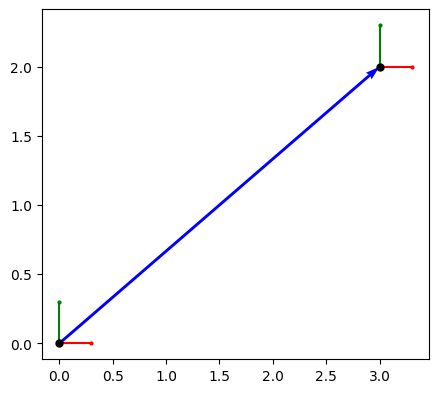

In [134]:
import numpy as np

def make_2d_translation_matrix(tx, ty):
    """
    2次元平面における平行移動行列を求める
    
    Parameters
    ----------
    tx : float
        x軸方向の移動
    ty : float
        y軸方向の移動

    Returns
    -------
    translation_matrix : numpy.ndarray
        2次元の平行移動行列
    """
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0,  1]])

##### ここを変更すると結果が変わります #######
# 変換前座標
x1, y1 = 0, 0
# 平行移動量（tx, ty）
tx, ty = 3, 2 
#############################################

# 座標系1->座標系2への平行移動行列
T12 = make_2d_translation_matrix(tx,ty) 

# 変換前 (x1, y1, 1)^T
o1 = np.array([[x1],
               [y1],
               [1]])

# 座標変換
o2 = T12@o1

# 変換後の座標(x2, y2)
x2, y2 = o2[0][0], o2[1][0]

# （座標系1から見た時の）各座標系の位置を表示
print("変換前 = (", x1, ",", x1, ")")
print("変換後 = (", x2, ",", y2, ")")

########################### 以下描画用 ########################
import matplotlib.pyplot as plt

def draw_link_coordinate(ax, matrix, axes_length):   
    """
    2次元の変換行列より単位ベクトルを描画
    
    Parameters
    ----------
    ax : matplotlib.axes._axes.Axes
        描画用
    matrix: numpy.array
        2次元の変換行列
    axes_length : float
        各軸方向の単位ベクトルの長さ

    Returns
    -------
    なし
    """
    # x方向の単位ベクトル
    unit_x = matrix@np.array([[axes_length],
                              [0],
                              [1]])

    # y方向の単位ベクトル
    unit_y = matrix@np.array([[0],
                              [axes_length],
                              [1]])
                   
    x = matrix[0][2]; y = matrix[1][2]
    
    # x方向の単位ベクトルを描画
    ax.plot([x, unit_x[0][0]], [y, unit_x[1][0]], "o-", color="red", ms=2) 
    # y方向の単位ベクトル
    ax.plot([x, unit_y[0][0]], [y, unit_y[1][0]], "o-", color="green", ms=2) 

fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(2,1,1)
axes_length = 0.3
draw_link_coordinate(ax, np.array([[1, 0, 0],
                                   [0, 1, 0],
                                   [0, 0, 1]]), axes_length) # 座標系1の描画
ax.plot(x1, y1, marker='.', markersize=10, color="black") # 変換前座標(x1,y1)
draw_link_coordinate(ax, T12, axes_length) # 座標系2の描画
ax.plot(x2, y2, marker='.', markersize=10, color="black") # 変換後座標(x2,y2)
plt.quiver(x1, y1, (x2-x1), (y2-y1), angles='xy', scale_units='xy', scale=1, color="blue") # (x1,y1)->(x2,y2)へ向かうベクトル

## 回転行列

変換前 ( 0 , 0 )
変換後 ( 0.0 , 0.0 )


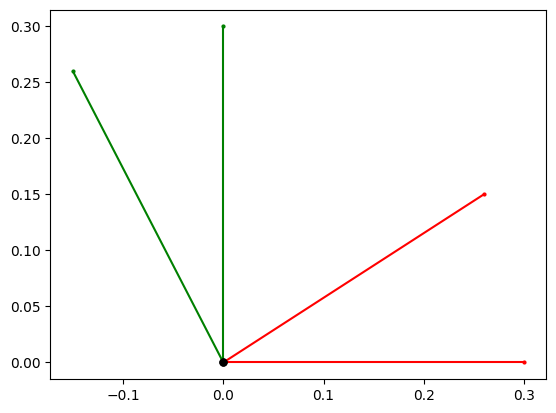

In [200]:
import numpy as np
import math

def make_2d_rotate_matrix(theta):
    """
    2次元平面における回転行列を求める
    
    Parameters
    ----------
    theta : float
        回転角度(rad)

    Returns
    -------
    2d_rotate_matrix : numpy.ndarray
        2次元の回転行列
    """
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta),  np.cos(theta), 0],
                     [            0,              0, 1]])

##### ここを変更すると結果が変わります #######
# 変換前座標
x1, y1 = 0, 0
# 回転量
theta = 30
#############################################

# 座標系1->座標系2への回転行列
theta = math.radians(theta)
R12 = make_2d_rotate_matrix(theta)

# 変換前 (x1, y1, 1)^T
o1 = np.array([[x1],
               [y1],
               [1]])

# 座標変換
o2 = R12@o1

# 変換後の座標(x2, y2)
x2, y2 = o2[0][0], o2[1][0]

#（座標系1から見た時の）各座標系の位置を表示
print("変換前 (", x1, ",", y1, ")")
print("変換後 (", x2, ",", y2, ")")

########################### 以下描画用 ########################
import matplotlib.pyplot as plt

def draw_link_coordinate(ax, matrix, axes_length):   
    """
    2次元の変換行列より単位ベクトルを描画
    
    Parameters
    ----------
    ax : matplotlib.axes._axes.Axes
        描画用
    matrix: numpy.array
        2次元の変換行列
    axes_length : float
        各軸方向の単位ベクトルの長さ

    Returns
    -------
    なし
    """
    # x方向の単位ベクトル
    unit_x = matrix@np.array([[axes_length],
                              [0],
                              [1]])

    # y方向の単位ベクトル
    unit_y = matrix@np.array([[0],
                              [axes_length],
                              [1]])
                   
    x = matrix[0][2]; y = matrix[1][2]
    
    # x方向の単位ベクトルを描画
    ax.plot([x, unit_x[0][0]], [y, unit_x[1][0]], "o-", color="red", ms=2) 
    # y方向の単位ベクトル
    ax.plot([x, unit_y[0][0]], [y, unit_y[1][0]], "o-", color="green", ms=2) 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

axes_length = 0.3
draw_link_coordinate(ax, np.array([[1, 0, 0],
                                   [0, 1, 0],
                                   [0, 0, 1]]), axes_length) # 座標系1の描画
ax.plot(x1, y1, marker='.', markersize=10, color="black") # 変換前座標(x1,y1)
draw_link_coordinate(ax, R12, axes_length) # 座標系2の描画
ax.plot(x2, y2, marker='.', markersize=10, color="black") # 変換前座標(x2,y2)

## 同時変換行列

(xe, ye)= 0.9823619097949593 4.529927863931453


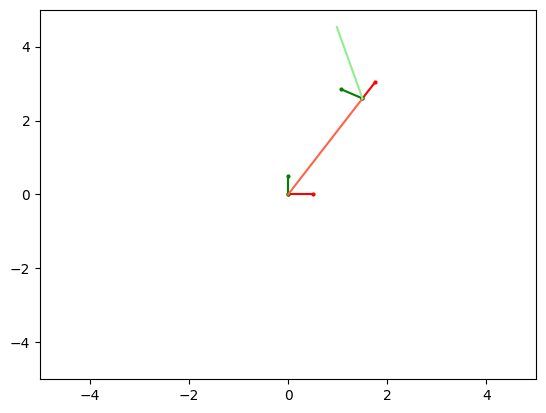

In [204]:
import numpy as np

def make_homogeneous_transformation_matrix(link_length, theta):
    """
    2次元平面における同次変換行列を求める
    
    Parameters
    ----------
    link_length : float
        リンクの長さ
    theta : float
        回転角度(rad)

    Returns
    -------
    T : numpy.ndarray
        同時変換行列
    """
    return np.array([[np.cos(theta), -np.sin(theta), link_length*np.cos(theta)],
                     [np.sin(theta),  np.cos(theta), link_length*np.sin(theta)],
                     [            0,              0,                        1]])

##### ここを変更すると結果が変わります #######
# 各リンクの長さを定義
l1 = 3.0
l2 = 2.0

# 各リンクの回転角度を定義
theta1 = 60
theta2 = 45
############################################

theta1 = np.deg2rad(theta1)
theta2 = np.deg2rad(theta2)


# リンク1座標系 -> リンク2座標系への変換行列
H12 = make_homogeneous_transformation_matrix(l1, theta1) # T12：link「1」座標系 -> link「2」座標系
# リンク2座標系 -> エンドエフェクタ座標系への変換行列
H2e = make_homogeneous_transformation_matrix(l2, theta2) # T2e：link「2」座標系 ->「e」nd effector座標系

# 「link1座標系 -> エンドエフェクタ座標系に変換する同時変換行列H12e」をあらかじめ定義
H12e = H12@H2e # T1e：link「1」座標系 ->「e」nd effector座標系

x1, y1 = 0, 0
# H12eを使って、link1座標系から見た時の、エンドエフェクタ座標系の位置を求める
oe = H12e@np.array([[x1],
                    [y1],
                    [1]])
xe, ye = oe[0][0], oe[1][0]
print("(xe, ye)=", xe, ye)


############# 以下描画用 ###################################
import matplotlib.pyplot as plt
%matplotlib inline

def draw_link_coordinate(ax, matrix, axes_length):   
    """
    2次元の変換行列より単位ベクトルを描画
    
    Parameters
    ----------
    ax : matplotlib.axes._axes.Axes
        描画用
    matrix: numpy.array
        2次元の変換行列
    axes_length : float
        各軸方向の単位ベクトルの長さ

    Returns
    -------
    なし
    """
    # x方向の単位ベクトル
    unit_x = matrix@np.array([[axes_length],
                              [0],
                              [1]])

    # y方向の単位ベクトル
    unit_y = matrix@np.array([[0],
                              [axes_length],
                              [1]])
                   
    x = matrix[0][2]; y = matrix[1][2]
    
    # x方向の単位ベクトルを描画
    ax.plot([x, unit_x[0][0]], [y, unit_x[1][0]], "o-", color="red", ms=2) 
    # y方向の単位ベクトル
    ax.plot([x, unit_y[0][0]], [y, unit_y[1][0]], "o-", color="green", ms=2) 

o2 = H12@np.array([[x1],
                   [y1],
                   [1]])
x2, y2 = o2[0][0], o2[1][0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xlim(-(l1+l2), l1+l2)
ax.set_ylim(-(l1+l2), l1+l2)

axes_length = (l1+l2)*0.1
draw_link_coordinate(ax, np.array([[1, 0, 0],
                                   [0, 1, 0],
                                   [0, 0, 1]]), axes_length) # 座標系1の描画
draw_link_coordinate(ax, H12, axes_length) # 座標系2の描画

ax.plot([x1, x2], [y1, y2], color="tomato") # link1の描画
ax.plot([x2, xe], [y2, ye], color="lightgreen") # link2の描画

plt.show()

In [205]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
%matplotlib inline

def make_homogeneous_transformation_matrix(link_length, theta):
    """
    2次元平面における同次変換行列を求める
    
    Parameters
    ----------
    link_length : float
        リンクの長さ
    theta : float
        回転角度(rad)

    Returns
    -------
    T : numpy.ndarray
        同時変換行列
    """
    return np.array([[np.cos(theta), -np.sin(theta), link_length*np.cos(theta)],
                     [np.sin(theta),  np.cos(theta), link_length*np.sin(theta)],
                     [            0,              0,                        1]])



def draw_link_coordinate(ax, matrix, axes_length):   
    """
    2次元の変換行列より単位ベクトルを描画
    
    Parameters
    ----------
    ax : matplotlib.axes._axes.Axes
        描画用
    matrix: numpy.array
        2次元の変換行列
    axes_length : float
        各軸方向の単位ベクトルの長さ

    Returns
    -------
    なし
    """
    # x方向の単位ベクトル
    unit_x = matrix@np.array([[axes_length],
                              [0],
                              [1]])

    # y方向の単位ベクトル
    unit_y = matrix@np.array([[0],
                              [axes_length],
                              [1]])
                   
    x = matrix[0][2]; y = matrix[1][2]
    
    # x方向の単位ベクトルを描画
    ax.plot([x, unit_x[0][0]], [y, unit_x[1][0]], "o-", color="red", ms=2) 
    # y方向の単位ベクトル
    ax.plot([x, unit_y[0][0]], [y, unit_y[1][0]], "o-", color="green", ms=2) 

def generate_vbox_text_widget(link_num):
    """
    text widgetsをlink_num個作成 -> Vboxに格納して縦に並べる（範囲は-180〜180）
    
    Parameters
    ----------
    link_num : int
        ロボットのリンクの数

    Returns
    -------
    vox_text_widgets : ipywidgets.widgets.widget_box.VBox
        text widgetsをnum個，縦に並べたVBox
    """
    text_widgets = []
    for i in range(link_num):
      text_widgets.append(ipywidgets.FloatText(min=-180.0, max=180.0))
    vox_text_widgets = ipywidgets.VBox(text_widgets)
    return vox_text_widgets

def generate_vbox_slider_widget(link_num):
    """
    slider widgetsをlink_num個作成 -> Vboxに格納して縦に並べる．（範囲は-180〜180）
    
    Parameters
    ----------
    link_num : int
        ロボットのリンクの数

    Returns
    -------
    vox_slider_widgets : ipywidgets.widgets.widget_box.VBox
        slider widgetsをnum個，縦に並べたVBox
    """
    slider_widgets = []
    for i in range(link_num):
      slider_widgets.append(ipywidgets.FloatSlider(value=0.0, min=-180.0, max=180.0, description = "param"+str(i+1), disabled=False))
    vox_slider_widgets = ipywidgets.VBox(slider_widgets)
    return vox_slider_widgets


def link_slider_and_text(box1, box2, link_num):
    """
    Box内の複数のwidetを連携させる（二つのbox内のwidgetの数が同じである必要あり）
    
    Parameters
    ----------
    box1 : ipywidgets.widgets.widget_box.VBox
        boxの名前
    box2 : ipywidgets.widgets.widget_box.VBox
        boxの名前
    link_num : int
        linkの数
    """
    for i in range(link_num):
      ipywidgets.link((box1.children[i], 'value'), (box2.children[i], 'value'))

def draw_interactive(link_num):
    """
    結果をアニメーションで表示
    Parameters
    ----------
    link_num : int
        linkの数
    """
    # slider widgetを作成
    posture_sliders = generate_vbox_slider_widget(link_num)
    # text widgetを作成
    posture_texts = generate_vbox_text_widget(link_num)

    # slider widget と　posture widget を横に並べる
    slider_and_text = ipywidgets.Box([posture_sliders, posture_texts])

    # slider wiget と text widget を連携
    link_slider_and_text(posture_sliders, posture_texts, link_num)

    # リセットボタン
    reset_button = ipywidgets.Button(description = "Reset")
    # 姿勢のリセットボタン
    def reset_values(button):
        for i in range(link_num):
            posture_sliders.children[i].value = 0.0
    reset_button.on_click(reset_values)

    # main文にslider widgetsの値を渡す
    params = {}
    for i in range(link_num):
        params[str(i)] = posture_sliders.children[i]
    final_widgets = ipywidgets.interactive_output(main, params)
    
    display(slider_and_text, reset_button, final_widgets)

def main(*args, **kwargs):

    params = kwargs
    
    ################ ここから同次変換行列による順運動学の処理（メイン部分） #############################
    # 各linkの長さ（不変）
    l1 = 4.0
    l2 = 4.0

    # 回転角度（可変）
    theta1 = params["0"]
    theta2 = params["1"]

    theta1 = np.deg2rad(theta1)
    theta2 = np.deg2rad(theta2)

    # 同次変換行列
    T12 = make_homogeneous_transformation_matrix(l1, theta1) # T12：link「1」座標系 -> link「2」座標系
    T2e = make_homogeneous_transformation_matrix(l2, theta2) # T2e：link「2」座標系 -> 「e」nd effector座標系

    # 「link1座標系」から「n番目のlink座標系」までの同次変換行列を定義
    T1e = T12@T2e # T1e：link「1」座標系 -> 「e」nd effector座標系
    
    # link1座標系の原点を基準とした時の，各linkの原点座標
    x1, y1 = 0, 0

    # link1座標系 -> link2座標系への変換
    o2 = T12@np.array([[x1],
                       [y1],
                       [1]])
    x2, y2 = o2[0][0], o2[1][0]

    # link1座標系 -> end effector座標系への変換
    oe = T1e@np.array([[x1],
                       [y1],
                       [1]])
    xe, ye = oe[0][0], oe[1][0]
    ###################### ここまで同次変換行列による順運動学の処理 ######################3


    ######### 以下，描画関連 #####################################################
    fig = plt.figure(figsize=(5,10))
    ax1 = fig.add_subplot(2,1,1)
    # 各linkの描画
    ax1.plot([x1, x2], [y1, y2], "-", color="tomato", ms=6) # link1
    ax1.plot([x2, xe], [y2, ye], "-", color="lightgreen", ms=6) # link2

    # 各linkの座標軸を描画
    axes_length = (l1+l2)*0.1 # 各座標系の軸の長さは「リンクの長さ×0.1」に設定
    draw_link_coordinate(ax1, np.array([[1, 0, 0],
                                        [0, 1, 0],
                                        [0, 0, 1]]), axes_length)
    draw_link_coordinate(ax1, T12, axes_length)
    draw_link_coordinate(ax1, T1e, axes_length)
    
    # 範囲設定
    ax1.set_xlim(-(l1+l2), l1+l2)
    ax1.set_ylim(-(l1+l2), l1+l2)

    # 軸ラベル
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    plt.show()

draw_interactive(2)

Box(children=(VBox(children=(FloatSlider(value=0.0, description='param1', max=180.0, min=-180.0), FloatSlider(…

Button(description='Reset', style=ButtonStyle())

Output()